# EDA-Project 1

This is your first project from the second block of the Data Science course.
You are provided with the following file: ```"foreign_exchange_rates.csv"```.

Make an EDA according to the data.
List the questions you think are important. Then try to answer each question, with a sub visualization. Please make your code clean and your arguments understandable.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!matplotlib inline
import seaborn as sns

'matplotlib' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
file_csv = [f for f in os.listdir()]
file_csv

['.ipynb_checkpoints',
 'eda-project-1.ipynb',
 'eda-project-2.ipynb',
 'foreign_exchange_rates.csv',
 'houses_to_rent.csv',
 'project1.zip',
 'project2.zip']

In [90]:
rates = pd.read_csv('foreign_exchange_rates.csv')

# Basic Description and Handling of Missing Values

In [91]:
rates.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [92]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Unnamed: 0                                 5217 non-null   int64 
 1   Time Serie                                 5217 non-null   object
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object
 3   EURO AREA - EURO/US$                       5217 non-null   object
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object
 6   BRAZIL - REAL/US$                          5217 non-null   object
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object
 8   CHINA - YUAN/US$                           5217 non-null   object
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object
 10  INDIA - INDIAN RUPEE/US$            

In [93]:
rates.isna().sum()

Unnamed: 0                                   0
Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND -

- Remove the column that repeats the index
- Note that there is no NaN value but not numeric
- Change the Time Serie column in datatime format

In [94]:
rates.drop('Unnamed: 0',inplace=True,axis=1)

In [95]:
from datetime import datetime

In [96]:
rates['Time Serie'] = pd.to_datetime(rates['Time Serie'], format='%Y-%m-%d').dt.strftime('%d-%m-%Y')
rates['weekday'] = pd.to_datetime(rates['Time Serie'], format='%d-%m-%Y').dt.strftime('%A')
rates['year'] = pd.to_datetime(rates['Time Serie'], format='%d-%m-%Y').dt.strftime('%Y')

- Let's take the Time Serie column as indices for further analysis

In [97]:
rates.index = pd.to_datetime(rates['Time Serie'], format='%d-%m-%Y')
rates = rates.drop(columns=['Time Serie'])

In [98]:
rates.head(10)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,weekday,year
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,1128,...,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97,Monday,2000
2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13,Tuesday,2000
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,1135,...,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1,Wednesday,2000
2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,1146.5,...,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62,Thursday,2000
2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,1138,...,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3,Friday,2000
2000-01-10,1.5242,0.9754,1.935,0.6107,1.819,1.4568,8.2794,7.7785,43.55,1133.5,...,105.28,3.8,8.024,8.449,73.3,1.5704,30.83,37.27,Monday,2000
2000-01-11,1.5209,0.9688,1.9365,0.6068,1.8225,1.457,8.2795,7.7785,43.6,1147,...,106.09,3.8,7.969,8.397,73.35,1.5605,30.83,37.61,Tuesday,2000
2000-01-12,1.5202,0.9727,1.9286,0.6073,1.835,1.455,8.2796,7.7787,43.6,1144.5,...,105.76,3.8,7.977,8.418,73.35,1.566,30.8,37.54,Wednesday,2000
2000-01-13,1.4954,0.9737,1.9084,0.6067,1.814,1.4495,8.2798,7.7788,43.55,1135.5,...,106.09,3.8,7.9425,8.417,73.35,1.5707,30.8,37.49,Thursday,2000


In [99]:
rates['weekday'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [100]:
rates.describe()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,weekday,year
count,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,...,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217
unique,2959,2704,2681,2303,3880,3147,2711,893,1998,3423,...,2848,1788,4511,4574,1781,3190,714,1380,5,20
top,ND,ND,ND,ND,ND,ND,8.2765,ND,ND,ND,...,ND,3.8,ND,ND,ND,ND,ND,ND,Tuesday,2004
freq,198,198,198,198,198,198,208,198,199,198,...,198,1376,198,198,198,198,201,198,1044,262


- due to the fact that the value is not numeric but object, we cannot start the analysis, we convert all values to the Float type for numeric analysis
- note that there is an ND value in the top, we will first replace it with np.nan, in order to later replace its entire NaN value with the average of the values of two neighboring (a(n)=(a(n+1)+a(n- 1))/2), since by filling in the missing values with an estimate based on neighboring data points, we can reduce the impact of missing data on the analysis and preserve the overall trend of the time series.

In [101]:
cols_to_convert = [col for col in rates.columns if col not in ['Time Serie', 'weekday', 'year']]
rates[cols_to_convert] = rates[cols_to_convert].replace('ND', np.nan).astype(float)

In [102]:
rates[cols_to_convert] = rates[cols_to_convert].interpolate(method='linear', limit_direction='both')

In [103]:
rates.isna().sum()

AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND - FRANC/US$                      0
TAIWAN - NEW TAIWAN DOLLAR/US$               0
THAILAND - BA

In [17]:
rates.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Time Serie', length=5217, freq=None)

# Basic descriptions

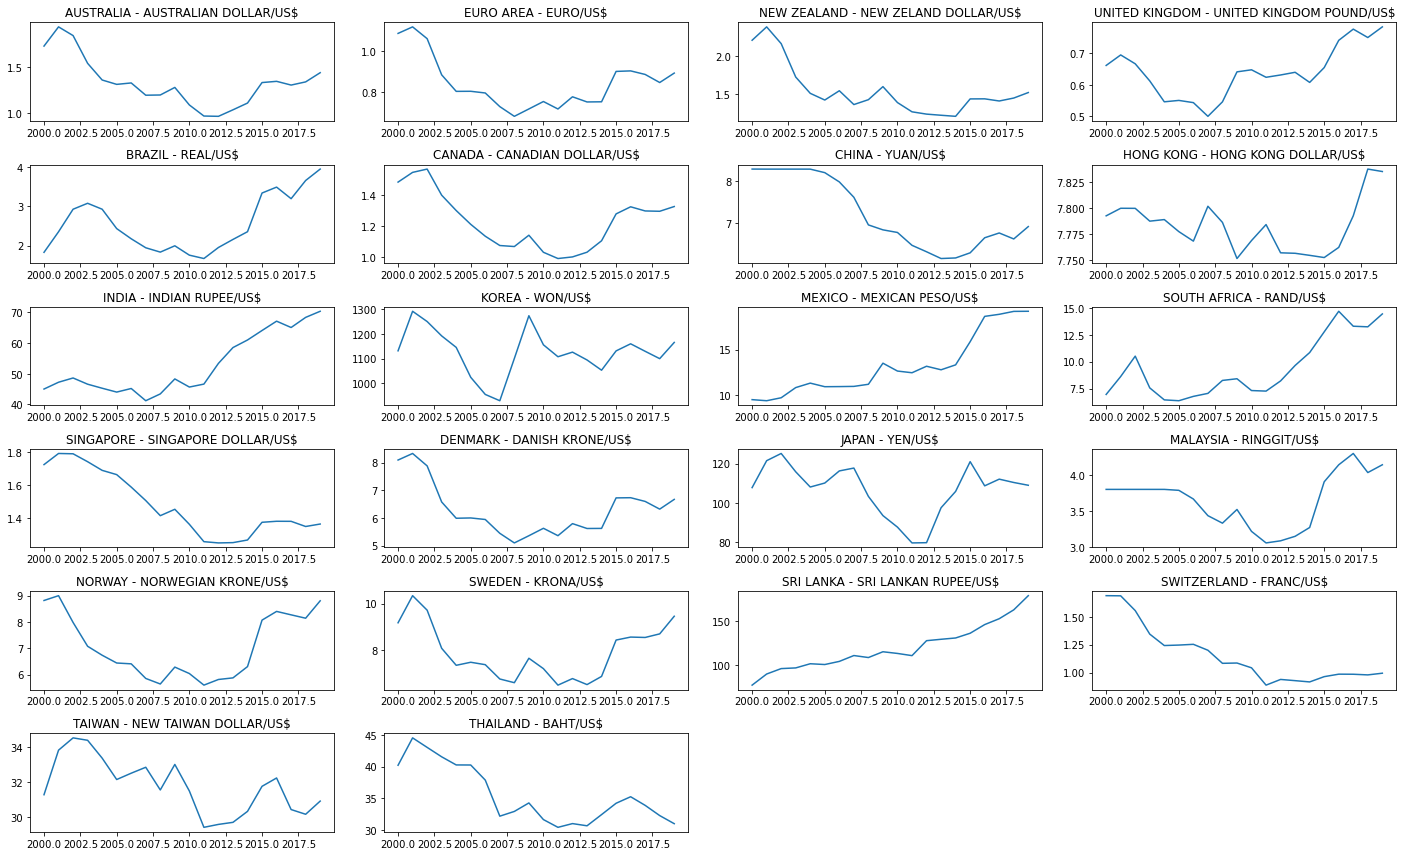

In [18]:
numeric_cols = rates.select_dtypes(include=['float']).columns
mean_by_year = rates.groupby([rates.index.year])[numeric_cols].mean()
mean_by_year

fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20, 12))

axs = axs.ravel()

for i, col in enumerate(mean_by_year.columns):
    axs[i].plot(mean_by_year.index, mean_by_year[col])
    axs[i].set_title(col)

for i in range(len(mean_by_year.columns), len(axs)):
    axs[i].axis('off')

fig.tight_layout()

- **average currency change over 20 years (2000-2019)**
- **Australia, Euro Area, New Zeland, Canada, China, Singapore, Denmark, Switzerlnad, Thailand** strengthened their currencies against the dollar
- **United Kingdom** is the only currency whose ratio is less than 1
- **Sri Lanka** is the only currency that is growing steadily
- **Hong Kong** most stable varies between (7.750-7.825)

- Next, consider the currencies **Euro** and **Real**, since these are in two different continents and presumably have different graphs of change and correlation

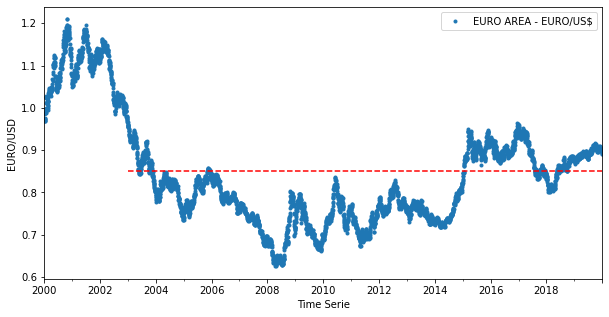

In [19]:
ax_euro = rates[['EURO AREA - EURO/US$']].plot(style=['.'],figsize=(10, 5))
plt.ylabel('EURO/USD')
plt.axhline(y=0.85,xmin=0.15,color='r', linestyle='--');

- Eur/USD ratio was higher before 2002 (ratio >1) but after it varies around 0.8 +- 0.15

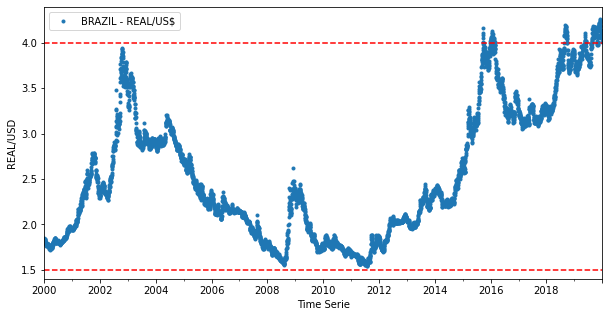

In [20]:
ax_real = rates[['BRAZIL - REAL/US$']].plot(style=['.'],figsize=(10, 5))
plt.ylabel('REAL/USD')
plt.axhline(y=4,color='r', linestyle='--')
plt.axhline(y=1.5,color='r', linestyle='--');

- Brazil Real is unstable against the dollar varies between 1.5 and 4. 2008 and 2012 Brazil Real was in a high position

In [21]:
euro_rates = rates[['EURO AREA - EURO/US$']]

In [22]:
brazil_rates = rates[['BRAZIL - REAL/US$']]

In [23]:
euro_rates.describe()

,EURO AREA - EURO/US$
count,5217.000000
mean,0.844075
std,0.126697
min,0.624600
25%,0.751200
50%,0.815800
75%,0.900300
max,1.209200


In [24]:
brazil_rates.describe()

,BRAZIL - REAL/US$
count,5217.000000
mean,2.550725
std,0.725450
min,1.537500
25%,1.946000
50%,2.331000
75%,3.132000
max,4.259400


- Let's look at the average weekly change over several years (2000-2019) of the Euro against the dollar in each year
- What year was the biggest decline?
- Until what year was the ratio of Euro to the Dollar above 1?

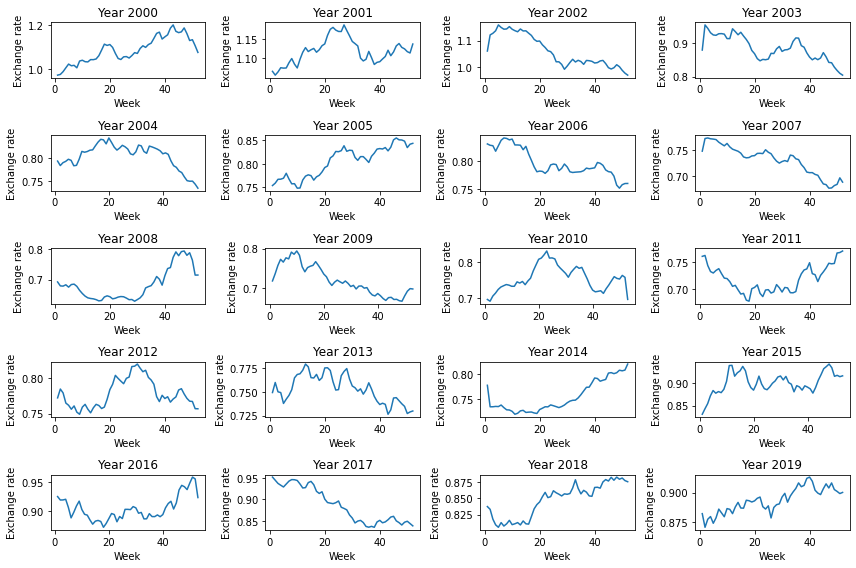

In [25]:
df_weekly = rates.groupby([rates.index.year, rates.index.week])[['EURO AREA - EURO/US$']].mean()

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.plot(df_weekly.loc[(df_weekly.index.levels[0][i],)], label='Data')
    ax.set_title(f'Year {i+2000}')

    ax.set_xlabel('Week')
    ax.set_ylabel('Exchange rate')

plt.tight_layout()

- until 2022, the ratio of Euro to the Dollar was above 1
- in 2017 there was a sharp rise (-0.1) more than in other years
- 2000,2001,2005, 2014,2015,2018,2019 can be marked with a minus sign for Euro

- And now let's look at the average weekly change over several years (2000-2019) Real to the dollar in each year

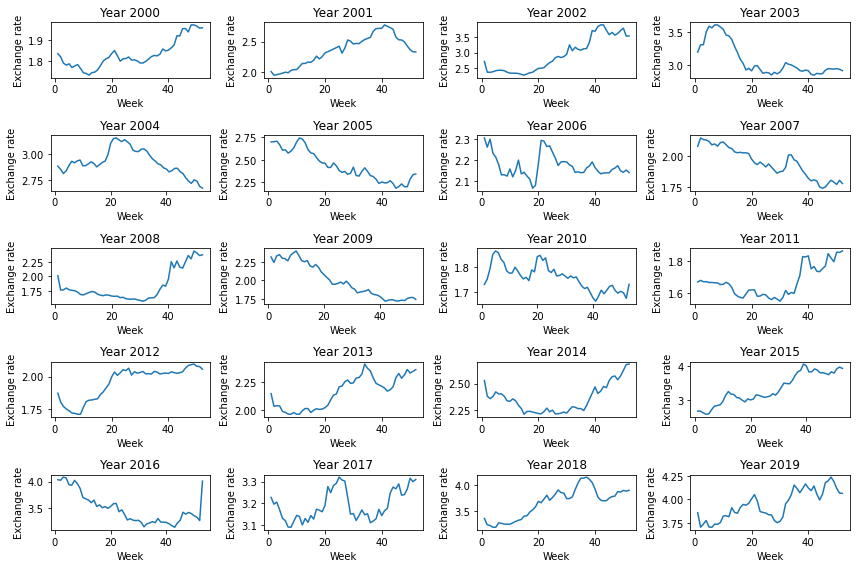

In [26]:
df_weekly_real = rates.groupby([rates.index.year, rates.index.week])[['BRAZIL - REAL/US$']].mean()

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.plot(df_weekly_real.loc[(df_weekly_real.index.levels[0][i],)], label='Data')
    ax.set_title(f'Year {i+2000}')

    ax.set_xlabel('Week')
    ax.set_ylabel('Exchange rate')

plt.tight_layout()

- 2003,2005,2009 were the best in terms of Real strengthening against the dollar (-0.5)
- 2015, on the contrary, became the worst (+1)
- in general, it can be noted that the currency is unstable

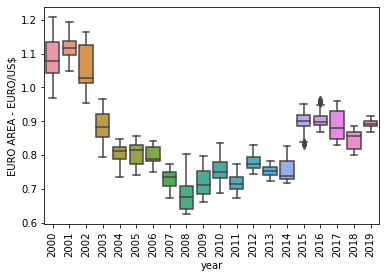

In [27]:
euro_ = rates[['EURO AREA - EURO/US$','year']]
ax = sns.boxplot(data=euro_,y='EURO AREA - EURO/US$',x='year')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

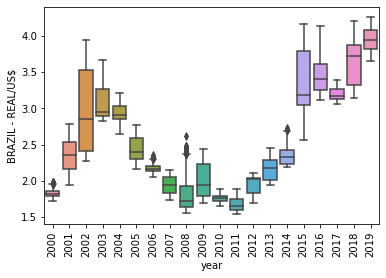

In [28]:
real_ = rates[['BRAZIL - REAL/US$','year']]
ax = sns.boxplot(data=real_,y='BRAZIL - REAL/US$',x='year')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

- In the Boxplot built by years, it can be noted that the IQR (Interquartile Range) EURO has a smaller range than IQR (Q3-Q1) REAL, which indicates the stability of the EURO currency
- EURO and REAL in 2002 have a big swing

### pct_change()

###### pct_change() - is a method in the pandas library used to calculate the percentage change between the current and previous element. That is, the daily change of the currency

In [29]:
def calculate_pct_change(df):
    currency_cols = [col for col in df.columns if 'US$' in col]
    df[currency_cols] = df[currency_cols].pct_change()
    return df

In [30]:
rates_change = calculate_pct_change(rates)

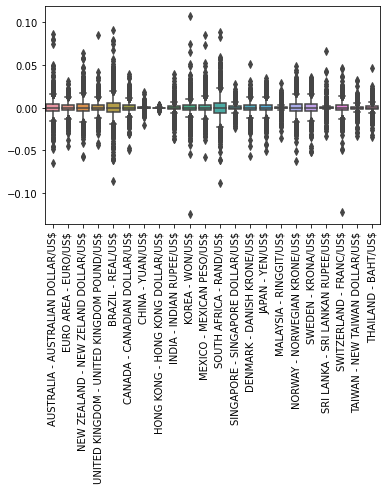

In [31]:
a = rates_change.iloc[1:,:-2]
ax = sns.boxplot(data=a)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

- Korea, Brazil, South Africa, Australia have strong changes
- The most stable Hong Kong, Euro, China does not change steadily

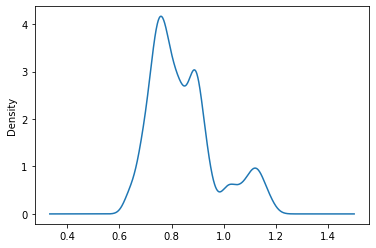

In [51]:
euro_rates['EURO AREA - EURO/US$'].plot(kind='kde');

In [32]:
euro_rates['retrun'] = euro_rates['EURO AREA - EURO/US$'].pct_change()

<ipython-input-32-634e1521811f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_rates['retrun'] = euro_rates['EURO AREA - EURO/US$'].pct_change()


In [33]:
brazil_rates['return'] = brazil_rates['BRAZIL - REAL/US$'].pct_change()

<ipython-input-33-c4384b284408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_rates['return'] = brazil_rates['BRAZIL - REAL/US$'].pct_change()


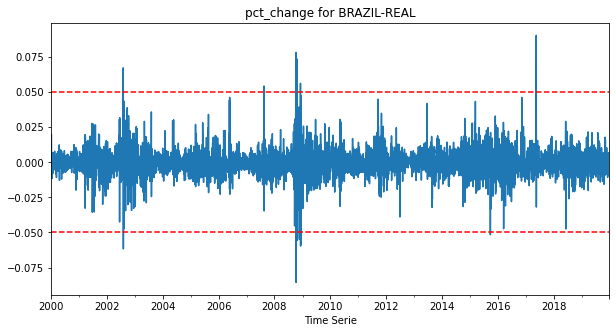

In [46]:
fig, ax = plt.subplots()
brazil_change = brazil_rates['return'].plot(style=['-'],figsize=(10, 5))
ax.axhline(y=0.05, color='r', linestyle='--')
ax.axhline(y=-0.05, color='r', linestyle='--')
ax.set_title("pct_change for BRAZIL-REAL");

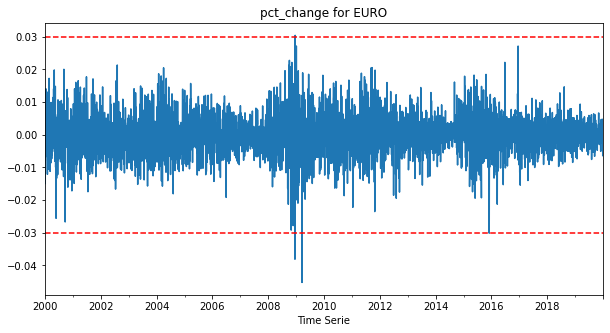

In [45]:
fig, ax = plt.subplots()
euro_change = euro_rates['retrun'].plot(style=['-'],figsize=(10, 5))
ax.axhline(y=0.03, color='r', linestyle='--')
ax.axhline(y=-0.03, color='r', linestyle='--')
ax.set_title("pct_change for EURO");

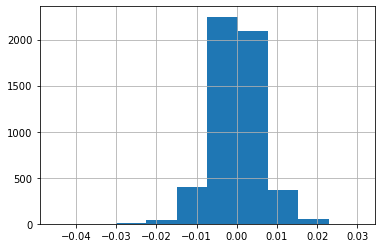

In [52]:
euro_rates['retrun'].hist();

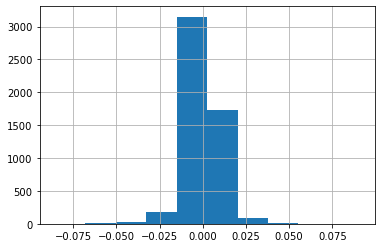

In [54]:
brazil_rates['return'].hist();

- **Chart pct_change() by years: Real and Euro**
- Euro has mostly fluctuated within 3% which indicates stability
- Real changed within 5%, but there were moments when it changed by > + - 7.5%, which indicates instability
- The normality of the EURO histogram confirms our assumption about the stability of the currency, which cannot be said about REAL, where its median has shifted to the left

# Correlation

- The last question, with which currencies do EURO and REAL correlate?
- for correlation, we exclude the last two columns, to assess the correlation between currencies

In [104]:
rates_wth2 = rates.iloc[:, :-2]
rates_wth2

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.98470,1.9033,0.61460,1.80500,1.4465,8.27980,7.7765,43.550,1128.000,...,1.6563,7.3290,101.700,3.80000,7.96400,8.44300,72.30,1.58080,31.380,36.97
2000-01-04,1.5239,0.97000,1.9238,0.61090,1.84050,1.4518,8.27990,7.7775,43.550,1122.500,...,1.6535,7.2180,103.090,3.80000,7.93400,8.36000,72.65,1.55650,30.600,37.13
2000-01-05,1.5267,0.96760,1.9339,0.60920,1.85600,1.4518,8.27980,7.7780,43.550,1135.000,...,1.6560,7.2080,103.770,3.80000,7.93500,8.35300,72.95,1.55260,30.800,37.10
2000-01-06,1.5291,0.96860,1.9436,0.60700,1.84000,1.4571,8.27970,7.7785,43.550,1146.500,...,1.6655,7.2125,105.190,3.80000,7.94000,8.36750,72.95,1.55400,31.750,37.62
2000-01-07,1.5272,0.97140,1.9380,0.61040,1.83100,1.4505,8.27940,7.7783,43.550,1138.000,...,1.6625,7.2285,105.170,3.80000,7.96600,8.41500,73.15,1.56230,30.850,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,1.4428,0.90145,1.5030,0.77035,4.07175,1.3142,7.00065,7.7876,71.255,1162.195,...,1.3545,6.7347,109.525,4.13435,8.89705,9.41205,181.30,0.98075,30.125,30.15
2019-12-26,1.4411,0.90070,1.5002,0.76880,4.06020,1.3124,6.99490,7.7880,71.280,1161.180,...,1.3540,6.7295,109.670,4.13370,8.87990,9.41080,181.30,0.98080,30.110,30.15
2019-12-27,1.4331,0.89490,1.4919,0.76390,4.05070,1.3073,6.99540,7.7874,71.450,1160.870,...,1.3520,6.6829,109.470,4.12600,8.82910,9.34050,181.35,0.97410,30.090,30.14


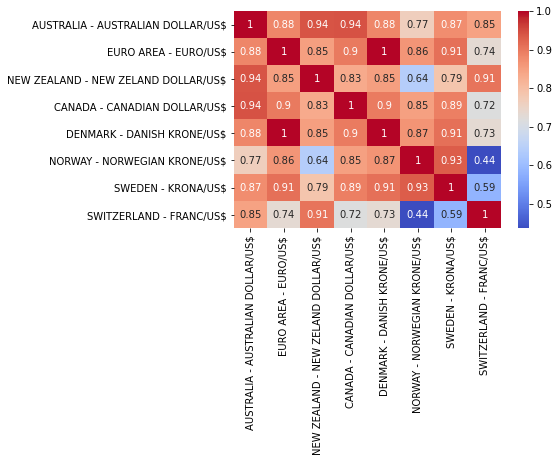

In [109]:
corr_matrix = rates_wth2.corr()
high_corr_cols = corr_matrix[abs(corr_matrix['EURO AREA - EURO/US$']) > 0.7].index
sns.heatmap(rates_wth2[high_corr_cols].corr(), annot=True, cmap='coolwarm');

- Correlation of Euro to the rest where the absolute correlation is above 0.7, note that these are the countries Australia, New Zeland, Canada, Denmark, Norway, Sweden, Switzerland; these countries have high GDP and in private Denmark,Norway,Sweden,Switzerland are part of the EU that these four mainly affect the Euro

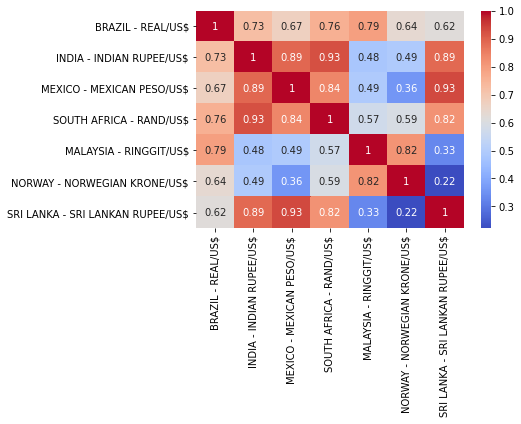

In [129]:
corr_matrix = rates_wth2.corr()
low_corr_cols = corr_matrix[abs(corr_matrix['BRAZIL - REAL/US$'])>0.6].index
sns.heatmap(rates_wth2[low_corr_cols].corr(), annot=True, cmap='coolwarm');

- Correlation of Brazil Real to others where absolute correlation is above 0.6: India,Mexico,South Africa, Malaysia, Norway, Sri Lanka

Some of the main insights that can be gained from analyzing this dataset include:
- Visualize trends in individual currencies over time, including identifying periods of appreciation or depreciation against the US dollar.
- Examining the relationships between different currencies and identifying any strong correlations or causal relationships.
- Identification of any patterns or trends in the volatility of various currencies.
The data set contains the ratio of 22 currencies to the dollar. After replacing the missing values with the average of the values of two neighbors, we analyzed the behavior of two currencies, Euro and Real. Euro and Real currencies were chosen for analysis due to their different geographic location and different historical characteristics over the period 2000 -2019 years. The Euro proved to be a stable currency with little volatility and correlation with the currencies of countries with high GDP, while the Real showed a trend towards higher percentage change values. This suggests that Real is a more volatile currency in this period (2000-2019), with large fluctuations in its exchange rate compared to the euro.
Real showed more volatility than Euro and was seen to be affected by the political and economic instability in Brazil.
In addition, a correlation matrix was calculated to understand the relationship between the various currency pairs in the dataset. It was observed that the Euro had a strong positive correlation with the currencies of other European countries, while the Real had a strong positive correlation with other emerging market currencies.
In addition, time series analysis was performed for both currencies and it was observed that the Euro exchange rate had a slight upward trend during the analyzed period, while the Real showed more fluctuations due to its sensitivity to political and economic instability in Brazil.
Finally, a heat map was built to visualize the correlation between different currency pairs in the dataset, and only pairs with an absolute correlation above 0.6 were displayed. This analysis provided insight into the relationships between different currencies in the dataset and can be used for further research and investment decisions.